### Importing libraries

In [1]:
# Reading the dataset
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Testing
import scipy

# Regression Analysis
import statsmodels.api as sm

## Reading the dataset

In [2]:
boston_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"
boston_df = pd.read_csv(boston_url, index_col=0)

In [3]:
display(boston_df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


## a. Descriptive Analysis

### 1. Median value of owner-occupied homes

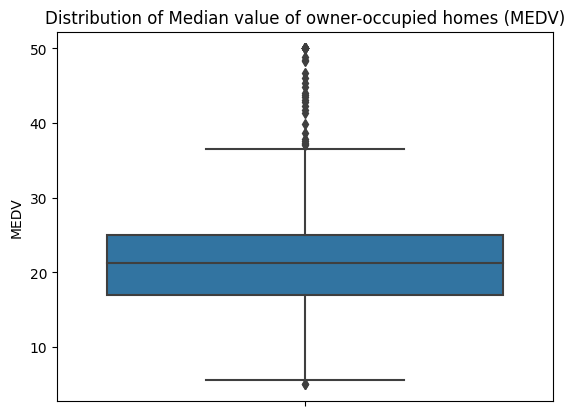

In [5]:
sns.boxplot(y="MEDV", data=boston_df)

plt.title("Distribution of Median value of owner-occupied homes (MEDV)")
plt.show()

In [6]:
boston_df[["MEDV"]].describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


### 2. Count of homes bounded by Charles river

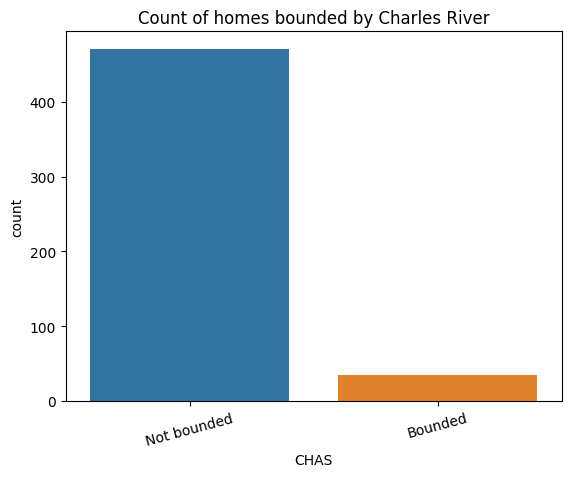

In [7]:
sns.countplot(x="CHAS", data=boston_df)

plt.title("Count of homes bounded by Charles River")
plt.xticks([0, 1], ["Not bounded", "Bounded"], rotation=15)
plt.show()

**Observation:** Count of properties bounded by Charles river is way too less than the one that are not bounded

### 3. Median value of owner-occupied homes by age group

In [8]:
# Creating groups
boston_df.loc[(boston_df["AGE"] < 35), "age_group"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] >= 35) & (boston_df["AGE"] < 70), "age_group"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "age_group"] = "70 years and older"

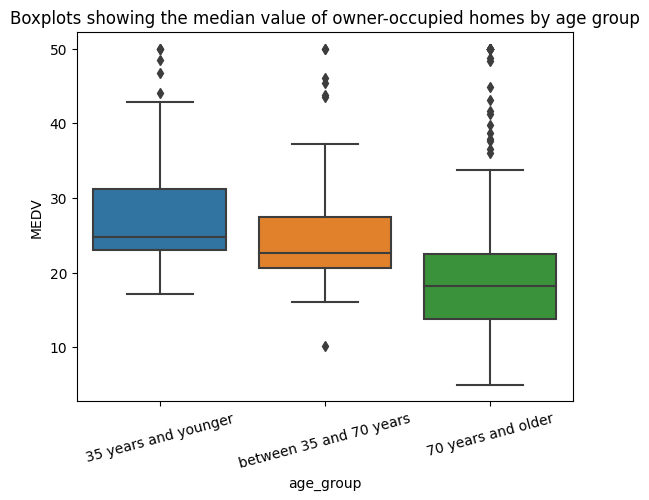

In [9]:
age_group_order = ["35 years and younger", "between 35 and 70 years", "70 years and older"]

sns.boxplot(
    x="age_group",
    y="MEDV",
    data=boston_df,
    order=age_group_order
)

plt.title("Boxplots showing the median value of owner-occupied homes by age group")
plt.xticks(rotation=15)
plt.show()

**Observations:**

* `35 years and younger` properties seems to be more expensive than the older ones
* The trend of younger properties values more than the older ones can be clearly seen on the median values of the age groups 

### 4. Relationship between nitric oxide concentrations and the proportion of non-retail business acres per town

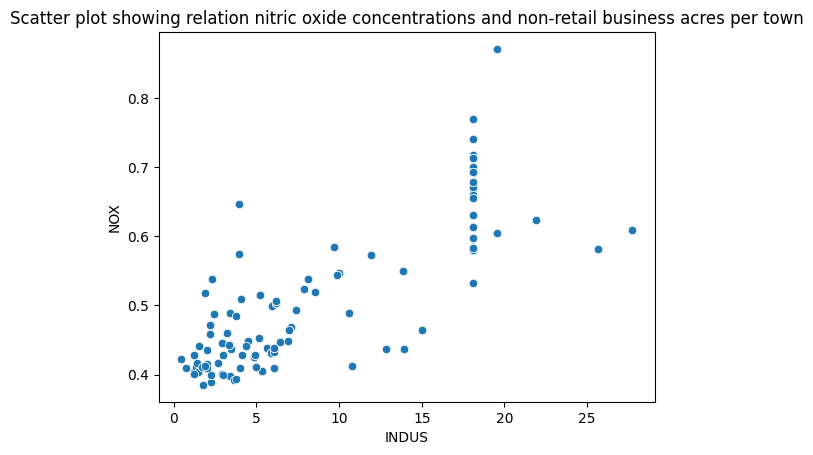

In [10]:
sns.scatterplot(
    x="INDUS",
    y="NOX",
    data=boston_df
)

plt.title("Scatter plot showing relation nitric oxide concentrations and non-retail business acres per town")
plt.show()

**Observations:**

* There is a linear-relationship between these two variables
* Higher the non-retail business greater is the nitric oxide concentration

### 5. Distribution of people to teacher ratio

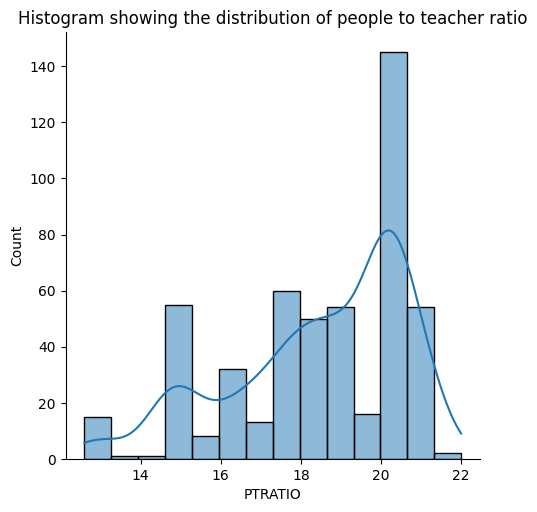

In [11]:
sns.displot(data=boston_df, x="PTRATIO", kde=True)

plt.title("Histogram showing the distribution of people to teacher ratio")
plt.show()

**Observation:** The distribution is left-skewed and the people to teacher ratio density is more in 18-21

## b. Performing statistical tests

Considering $\alpha = 0.05$ during the entire statistical testing

In [12]:
alpha = 0.05

In [13]:
def decide_variance_equality(p_value, alpha):
    if p_value > alpha:
        print("Variances are equal")
    
    elif p_value < alpha:
        print("Variances are not equal")

In [14]:
def decide_hypothesis(p_value, alpha):
    if p_value > alpha:
        print("Fail to reject the null hypothesis")
    
    elif p_value < alpha:
        print("Rejecting null hypothesis")

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not?

$H_{o}: \mu_{1} = \mu_{2}$ ("There is no difference in mean of the median value of houses bounded by the Charles river")

$H_{a}: \mu_{1} ≠ \mu_{2}$ ("There is a difference in mean of the median value of houses bounded by the Charles river")

In [15]:
# Preparing samples for testing
not_bounded_by_river = boston_df.loc[boston_df["CHAS"] == 0, "MEDV"]
bounded_by_river = boston_df.loc[boston_df["CHAS"] == 1, "MEDV"]

In [16]:
stat, p_value_levene = scipy.stats.levene(
    not_bounded_by_river,
    bounded_by_river,
    center="mean"
)

print(f"stat: {stat}, p-value: {p_value_levene}")

decide_variance_equality(p_value_levene, alpha)

stat: 8.75190489604598, p-value: 0.003238119367639829
Variances are not equal


In [17]:
t_statistics, p_value = scipy.stats.ttest_ind(
    not_bounded_by_river,
    bounded_by_river,
    equal_var=False
)

print(f"t-statistic: {t_statistics}, p-value: {p_value}")

decide_hypothesis(p_value, alpha)

t-statistic: -3.113291312794837, p-value: 0.003567170098137517
Rejecting null hypothesis


**Conclusion:** There is a difference in the median value of houses bounded by the Charles river

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

$H_{o}: \mu_{1} = \mu_{2} = \mu_{3}$ `There is no difference in mean of the MEDV for each age groups`

$H_{a}: \mu_{1} ≠ \mu_{2} ≠ \mu_{3}$ `There is a difference in mean of the MEDV for one of the age group`

In [18]:
# Preparing samples for testing
thirty_five_years_younger = boston_df.loc[boston_df["age_group"] == "35 years and younger", "MEDV"]
thirty_five_seventy = boston_df.loc[boston_df["age_group"] == "between 35 and 70 years", "MEDV"]
seventy_older = boston_df.loc[boston_df["age_group"] == "70 years and older", "MEDV"]

In [19]:
stat, p_value_levene = scipy.stats.levene(
    thirty_five_years_younger,
    thirty_five_seventy,
    seventy_older,
    center="mean"
)

print(f"stat: {stat}, p-value: {p_value_levene}")

decide_variance_equality(p_value_levene, alpha)

stat: 2.7806200293748304, p-value: 0.06295337343259205
Variances are equal


In [20]:
f_statistic, p_value = scipy.stats.f_oneway(
    thirty_five_years_younger,
    thirty_five_seventy,
    seventy_older
)

print(f"f-statistic: {f_statistic}, p-value: {p_value}")

decide_hypothesis(p_value, alpha)

f-statistic: 36.40764999196599, p-value: 1.7105011022702984e-15
Rejecting null hypothesis


**Conclusion:** There is a difference in mean of the MEDV for one of the age group

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

$H_{o}:$ `There is no correlation between nitric oxide concentration and proportion of non-retail business acres per town`

$H_{a}:$ `There is a correlation between nitric oxide concentration and proportion of non-retail business acres per town`

In [21]:
# Preparing samples for testing
non_retail_business = boston_df["INDUS"]
nitric_oxide = boston_df["NOX"]

In [22]:
corr_coeff, p_value = scipy.stats.pearsonr(non_retail_business, nitric_oxide)

print(f"corr_coeff: {corr_coeff}, p_value: {p_value}")

decide_hypothesis(p_value, alpha)

corr_coeff: 0.7636514469209151, p_value: 7.913361061238693e-98
Rejecting null hypothesis


**Conclusion:** There is a correlation between nitric oxide concentration and proportion of non-retail business acres per town

### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [23]:
X = boston_df["DIS"]
y = boston_df["MEDV"]

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.21e-08
Time:                        22:07:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since p_value < alpha we are rejecting the null hypothesis